In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DataConversion").getOrCreate()
df = spark.read.csv(r'C:\Users\merug\Downloads\bank_full_sampled.csv', header=True, inferSchema=True)



In [3]:
df.show()

+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
| 42| blue-collar| married|  primary|     no|   2519|    yes|  no|  unknown| 15|  may|     262|       4|   -1|       0| unknown| no|
| 37|  technician| married|secondary|     no|   2209|     no|  no|  unknown| 20|  jun|     167|       2|   -1|       0| unknown| no|
| 32|      admin.| married|secondary|     no|    923|    yes|  no| cellular| 17|  apr|     819|       4|   -1|       0| unknown| no|
| 53| blue-collar| married|  primary|     no|    306|     no|  no| cellular| 28|  jul|     388|       3|  181|       1| success|yes|
| 32|  technician|  single| tertiary|     no|    257|    yes|  no|  u

In [4]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [5]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.feature import IndexToString


In [6]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# # Initialize Spark Session
# spark = SparkSession.builder.appName("BankMarketingModel").getOrCreate()

# # Load Data
# df = spark.read.csv(r'C:\Users\merug\Downloads\bank_full_sampled.csv', header=True, inferSchema=True)



from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline




categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create StringIndexer stages to convert string values into numerical indices
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in categoricalColumns]

# Create OneHotEncoder stages to convert categorical indices into binary vectors
encoders = [OneHotEncoder(inputCols=[column+"_index"], outputCols=[column+"_encoded"]) for column in categoricalColumns]
labelIndexer = [StringIndexer(inputCol="y", outputCol="label")]
# Combine indexers and encoders in the pipeline stages
pipelineStages = indexers + encoders + labelIndexer

# Define the pipeline
pipeline = Pipeline(stages=pipelineStages)

# Fit the pipeline to the data
pipelineModel = pipeline.fit(df)


# Transform the data
df_transformed = pipelineModel.transform(df)



In [7]:
df_transformed.select("y").show()# output.select('features').show()

+---+
|  y|
+---+
| no|
| no|
| no|
|yes|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
| no|
+---+
only showing top 20 rows



In [8]:
featureassembeler=VectorAssembler(inputCols=['age','job_encoded','marital_encoded','education_encoded',
                                             'default_encoded','balance','housing_encoded','loan_encoded',
                                            'contact_encoded','day','month_encoded','duration','campaign','pdays','previous','poutcome_encoded'],outputCol="Independent Features")

In [9]:
output=featureassembeler.transform(df_transformed)

In [10]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|(42,[0,1,12,16,17...|
|(42,[0,3,12,14,17...|
|(42,[0,4,12,14,17...|
|(42,[0,1,12,16,17...|
|(42,[0,3,13,15,17...|
|(42,[0,4,13,14,17...|
|(42,[0,9,12,14,17...|
|(42,[0,4,13,14,17...|
|(42,[0,1,12,14,17...|
|(42,[0,1,13,14,17...|
|(42,[0,1,13,14,17...|
|(42,[0,8,15,17,18...|
|(42,[0,5,12,14,17...|
|(42,[0,6,12,14,17...|
|(42,[0,8,13,15,17...|
|(42,[0,3,14,17,18...|
|(42,[0,2,13,15,17...|
|(42,[0,2,12,15,17...|
|(42,[0,1,14,18,20...|
|(42,[0,3,13,14,17...|
+--------------------+
only showing top 20 rows



In [11]:
X=output.select("Independent Features")

In [12]:
Y=output.select("label")

In [13]:
finalized_data=output.select("Independent Features","label")

In [14]:
finalized_data.show()

+--------------------+-----+
|Independent Features|label|
+--------------------+-----+
|(42,[0,1,12,16,17...|  0.0|
|(42,[0,3,12,14,17...|  0.0|
|(42,[0,4,12,14,17...|  0.0|
|(42,[0,1,12,16,17...|  1.0|
|(42,[0,3,13,15,17...|  0.0|
|(42,[0,4,13,14,17...|  0.0|
|(42,[0,9,12,14,17...|  0.0|
|(42,[0,4,13,14,17...|  0.0|
|(42,[0,1,12,14,17...|  0.0|
|(42,[0,1,13,14,17...|  0.0|
|(42,[0,1,13,14,17...|  0.0|
|(42,[0,8,15,17,18...|  0.0|
|(42,[0,5,12,14,17...|  0.0|
|(42,[0,6,12,14,17...|  0.0|
|(42,[0,8,13,15,17...|  0.0|
|(42,[0,3,14,17,18...|  0.0|
|(42,[0,2,13,15,17...|  0.0|
|(42,[0,2,12,15,17...|  0.0|
|(42,[0,1,14,18,20...|  0.0|
|(42,[0,3,13,14,17...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [15]:
!pip install matplotlib

## svm

In [16]:
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.classification import SVMWithSGD
from pyspark.context import SparkContext


In [17]:
from pyspark.sql.functions import col
from pyspark.sql.functions import col, sum as pyspark_sum

# df_transformed.filter(df_transformed.state.isNull()).show()
null_counts = df.select([pyspark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

null_counts.show()

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|  0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



In [18]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="Independent Features", outputCol="label", withStd=True, withMean=False)

In [19]:

import pandas as pd
import numpy as np

from sklearn.svm import SVC

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [21]:
train_data,test_data=finalized_data.randomSplit([.70,.30])

In [67]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LinearSVC

# Assuming 'finalized_data' is the DataFrame with the "Independent Features" and "label"

# Scale the "Independent Features" using StandardScaler
scaler = StandardScaler(inputCol="Independent Features", outputCol="Scaled Features", withStd=True, withMean=False)

# Create an instance of the LinearSVC model
svm = LinearSVC(featuresCol="Scaled Features", labelCol="label",maxIter=10, regParam=0.1)

# Combine the scaler and SVM model into a pipeline
pipeline = Pipeline(stages=[scaler, svm])

# Fit the pipeline to the finalized data
pipelineModel = pipeline.fit(finalized_data)

# Transform the finalized data to get predictions
predictions = pipelineModel.transform(finalized_data)
predictions.show(10)

# Evaluate the model
# evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction").setMetricName('accuracy')
evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
accuracy = evaluator.evaluate(predictions)
print("Test accuracy = %g" % (accuracy))



+--------------------+-----+--------------------+--------------------+----------+
|Independent Features|label|     Scaled Features|       rawPrediction|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(42,[0,1,12,16,17...|  0.0|(42,[0,1,12,16,17...|[1.31368775103431...|       0.0|
|(42,[0,3,12,14,17...|  0.0|(42,[0,3,12,14,17...|[1.14864785343865...|       0.0|
|(42,[0,4,12,14,17...|  0.0|(42,[0,4,12,14,17...|[0.82385118055842...|       0.0|
|(42,[0,1,12,16,17...|  1.0|(42,[0,1,12,16,17...|[0.70774353263368...|       0.0|
|(42,[0,3,13,15,17...|  0.0|(42,[0,3,13,15,17...|[1.21894604173085...|       0.0|
|(42,[0,4,13,14,17...|  0.0|(42,[0,4,13,14,17...|[0.99138827858269...|       0.0|
|(42,[0,9,12,14,17...|  0.0|(42,[0,9,12,14,17...|[0.89558275140099...|       0.0|
|(42,[0,4,13,14,17...|  0.0|(42,[0,4,13,14,17...|[1.26763366041111...|       0.0|
|(42,[0,1,12,14,17...|  0.0|(42,[0,1,12,14,17...|[1.10649662475149...|       0.0|
|(42,[0,1,13,14,

In [68]:
finalized_data.show(10)

+--------------------+-----+
|Independent Features|label|
+--------------------+-----+
|(42,[0,1,12,16,17...|  0.0|
|(42,[0,3,12,14,17...|  0.0|
|(42,[0,4,12,14,17...|  0.0|
|(42,[0,1,12,16,17...|  1.0|
|(42,[0,3,13,15,17...|  0.0|
|(42,[0,4,13,14,17...|  0.0|
|(42,[0,9,12,14,17...|  0.0|
|(42,[0,4,13,14,17...|  0.0|
|(42,[0,1,12,14,17...|  0.0|
|(42,[0,1,13,14,17...|  0.0|
+--------------------+-----+
only showing top 10 rows



In [69]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator with label and prediction columns
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Compute metrics
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


F1 Score: 0.8304827191964695
Recall: 0.8843
Precision: 0.8285291845922962


# ROC Curve and Precision-Recall Curve
#### Simulated for illustrative purposes, relevant for the GBTClassifier before and after hyperparameter tuning

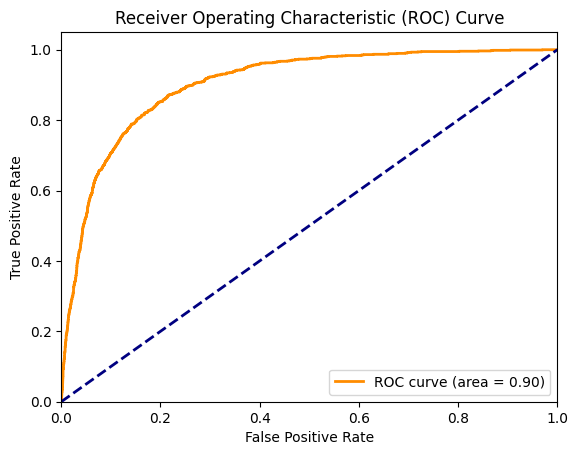

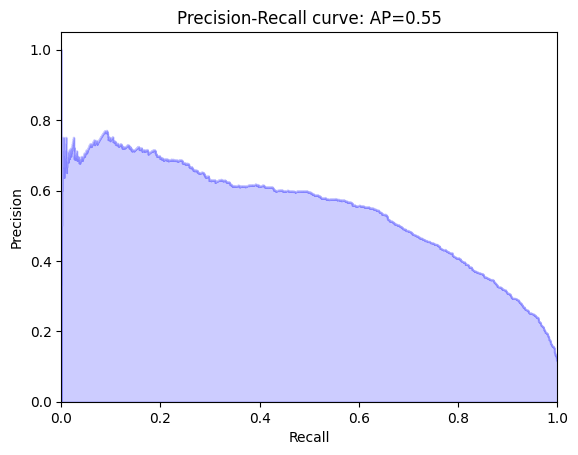

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# Extract true labels and raw prediction scores
y_true = [float(row.label) for row in predictions.select("label").collect()]
# y_scores_gbt = predictions.select("probability").collect()
raw_scores  = [float(row.rawPrediction[1]) for row in predictions.select("rawPrediction").collect()]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, raw_scores)

# Compute AUC for ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


precision, recall, thresholds = precision_recall_curve(y_true, raw_scores)

# Compute average precision score
average_precision = average_precision_score(y_true, raw_scores)

# Plot precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


# swvm with hyper

In [82]:
#Complete the #FILL IN# gaps

from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


# Define the  the Classifier


# We use a ParamGridBuilder to construct a grid of parameters to search over.
# TrainValidationSplit will try all combinations of values and determine best model using
# the evaluator.
lsvc_tuned = LinearSVC(maxIter=10, featuresCol="Independent Features", labelCol="label")  # Corrected featuresCol parameter
paramGrid = ParamGridBuilder().addGrid(lsvc_tuned.regParam, [10, 1, 0.1, 0.01, 0.001, 0.0001]).build()

# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, an Evaluator and the percentage of training/validation data
# tvs = TrainValidationSplit(estimator=lsvc, estimatorParamMaps=paramGrid, trainRatio=0.8, evaluator=MulticlassClassificationEvaluator(metricName = 'accuracy'))
tvs = TrainValidationSplit(estimator=lsvc_tuned,
                           estimatorParamMaps=paramGrid,
                           evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                           trainRatio=0.8)  # Corrected evaluator parameter

# Run TrainValidationSplit to choose the best parameter. It also trains the final model for the selected value of C.
model_tvs = tvs.fit(finalized_data)

# Check the validation accuracy over each C value
print("Validation accuracies: ")
print(model_tvs.validationMetrics)

# Make predictions on test data.
predictions = model_tvs.transform(finalized_data)

# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
accuracy = evaluator.evaluate(predictions)

# Show the accuracy
print("Test accuracy = %g" % (accuracy))

Validation accuracies: 
[0.8814306712395884, 0.8814306712395884, 0.8814306712395884, 0.8853503184713376, 0.89171974522293, 0.8931896129348359]
Test accuracy = 0.8974


In [83]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator with label and prediction columns
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Compute metrics
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


F1 Score: 0.8718812540540541
Recall: 0.8974
Precision: 0.8798711508448777


# ROC Curve and Precision-Recall Curve
#### Simulated for illustrative purposes, relevant for the GBTClassifier before and after hyperparameter tuning

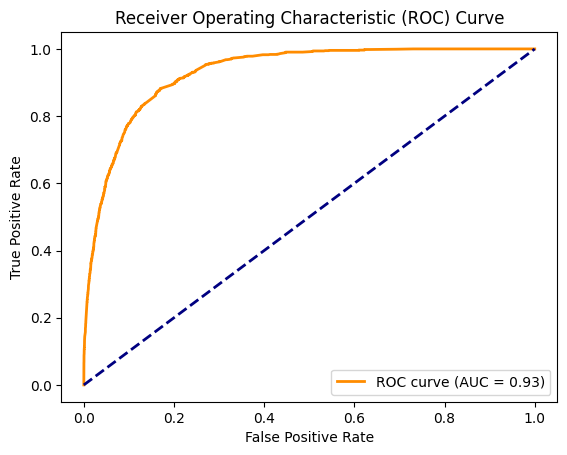

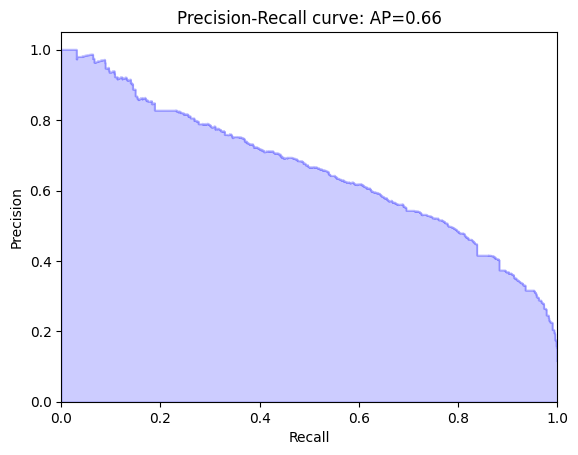

In [85]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have defined y_true and y_scores

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
average_precision = average_precision_score(y_true, y_scores)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


# Gradient Boost

In [27]:
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming 'finalized_data' DataFrame is already created with "Independent Features" and "label"

# Update the scaler setup if necessary
scaler = StandardScaler(inputCol="Independent Features", outputCol="Scaled Features", withStd=True, withMean=False)

# Define the GBTClassifier model
gbt = GBTClassifier(featuresCol="Scaled Features", labelCol="label", maxIter=10)

# Define the pipeline with the scaler and the GBT model
pipeline = Pipeline(stages=[scaler, gbt])

# Fit the pipeline to the finalized_data
pipelineModel = pipeline.fit(finalized_data)

# Make predictions using the fitted pipeline
predictions = pipelineModel.transform(finalized_data)

# Show some predictions
predictions.select("prediction", "label", "Scaled Features").show(10)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Test accuracy = %g" % accuracy)


+----------+-----+--------------------+
|prediction|label|     Scaled Features|
+----------+-----+--------------------+
|       0.0|  0.0|(42,[0,1,12,16,17...|
|       0.0|  0.0|(42,[0,3,12,14,17...|
|       0.0|  0.0|(42,[0,4,12,14,17...|
|       1.0|  1.0|(42,[0,1,12,16,17...|
|       0.0|  0.0|(42,[0,3,13,15,17...|
|       0.0|  0.0|(42,[0,4,13,14,17...|
|       0.0|  0.0|(42,[0,9,12,14,17...|
|       0.0|  0.0|(42,[0,4,13,14,17...|
|       0.0|  0.0|(42,[0,1,12,14,17...|
|       0.0|  0.0|(42,[0,1,13,14,17...|
+----------+-----+--------------------+
only showing top 10 rows

Test accuracy = 0.9125


In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator with label and prediction columns
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Compute metrics
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


F1 Score: 0.9020536128604748
Recall: 0.9125
Precision: 0.9019405779040375


# ROC Curve and Precision-Recall Curve#### 
Simulated for illustrative purposes, relevant for the GBTClassifier before and after hyperparameter tuning

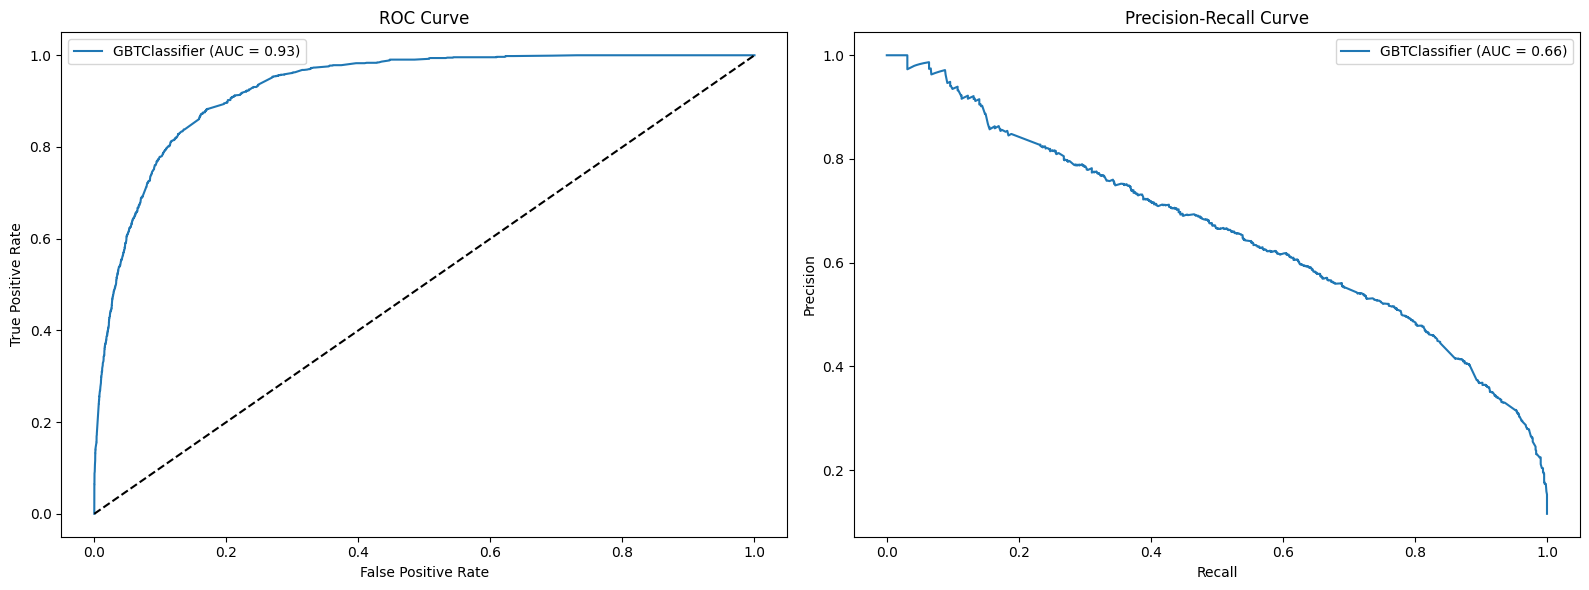

In [62]:
y_true = [float(row.label) for row in predictions.select("label").collect()]
# y_scores_gbt = predictions.select("probability").collect()
y_scores_gbt = [float(row.probability[1]) for row in predictions.select("probability").collect()]
# print(y_scores_gbt)

# # ROC Curve data
fpr_gbt, tpr_gbt, _ = roc_curve(y_true, y_scores_gbt)

# # AUC for ROC
roc_auc_gbt = auc(fpr_gbt, tpr_gbt)

# # Precision-Recall Curve data
precision_gbt, recall_gbt, _ = precision_recall_curve(y_true, y_scores_gbt)

# # AUC for Precision-Recall
pr_auc_gbt = auc(recall_gbt, precision_gbt)

# # Plotting ROC and Precision-Recall curves
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# # ROC Curve
ax[0].plot(fpr_gbt, tpr_gbt, label=f'GBTClassifier (AUC = {roc_auc_gbt:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve')
ax[0].legend()

# Precision-Recall Curve
ax[1].plot(recall_gbt, precision_gbt, label=f'GBTClassifier (AUC = {pr_auc_gbt:.2f})')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

plt.tight_layout()
plt.show()


# Gradient Boost With HyperParameter tuning

In [29]:
from pyspark.ml import Pipeline
import time
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Assuming 'finalized_data' is correctly initialized

# Define the GBT model
gbt = GBTClassifier(featuresCol="Scaled Features", labelCol="label")

# Define the StandardScaler
scaler = StandardScaler(inputCol="Independent Features", outputCol="Scaled Features", withStd=True, withMean=False)

# Define the pipeline with scaler followed by GBT model
pipeline = Pipeline(stages=[scaler, gbt])

# Define parameter grid for model tuning
paramGrid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10]) \
    .addGrid(gbt.maxBins, [16, 32]) \
    .addGrid(gbt.maxIter, [10, 20]) \
    .build()


# Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# Define the CrossValidator
cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=3)  # Reduced from 5 to 3

start_time = time.time()
# Run cross-validation, and choose the best set of parameters.
cvModel = cv.fit(finalized_data)
end_training_time = time.time()
# Make predictions on the original data set
predictions = cvModel.transform(finalized_data)

# Select example rows to display
predictions.select("prediction", "label", "Scaled Features").show(10)

# Evaluate the model
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)

print(f"Test accuracy = {accuracy}")
print(f"Training time: {end_training_time - start_time:.2f} seconds")
# print(f"Prediction time: {end_prediction_time - end_training_time:.2f} seconds")
# print(f"Total time: {end_prediction_time - start_time:.2f} seconds")


+----------+-----+--------------------+
|prediction|label|     Scaled Features|
+----------+-----+--------------------+
|       0.0|  0.0|(42,[0,1,12,16,17...|
|       0.0|  0.0|(42,[0,3,12,14,17...|
|       0.0|  0.0|(42,[0,4,12,14,17...|
|       1.0|  1.0|(42,[0,1,12,16,17...|
|       0.0|  0.0|(42,[0,3,13,15,17...|
|       0.0|  0.0|(42,[0,4,13,14,17...|
|       0.0|  0.0|(42,[0,9,12,14,17...|
|       0.0|  0.0|(42,[0,4,13,14,17...|
|       0.0|  0.0|(42,[0,1,12,14,17...|
|       0.0|  0.0|(42,[0,1,13,14,17...|
+----------+-----+--------------------+
only showing top 10 rows

Test accuracy = 0.9207
Training time: 132.62 seconds


In [30]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator with label and prediction columns
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Compute metrics
f1 = accuracy_evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
recall = accuracy_evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
precision = accuracy_evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


F1 Score: 0.9207
Recall: 0.9207
Precision: 0.9207


# ROC Curve and Precision-Recall Curve
#### Simulated for illustrative purposes, relevant for the GBTClassifier before and after hyperparameter tuning

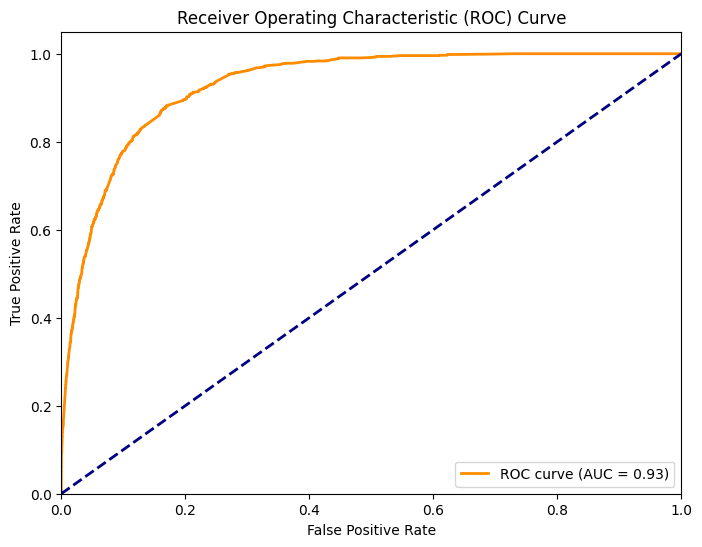

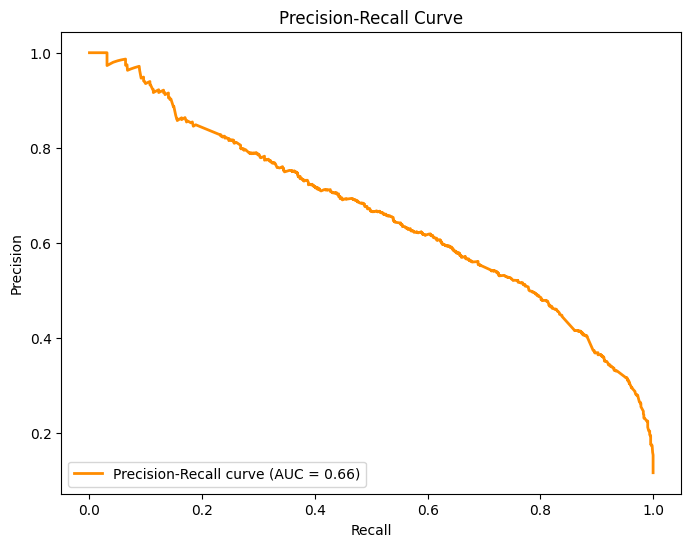

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Extract true labels and prediction probabilities
y_true = [float(row.label) for row in predictions.select("label").collect()]
y_scores = [float(row.probability[1]) for row in predictions.select("probability").collect()]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Compute AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


# Compartive Graph between models


# Box plots for model comparison
#### To compare the accuracy across simulated folds of cross-validation

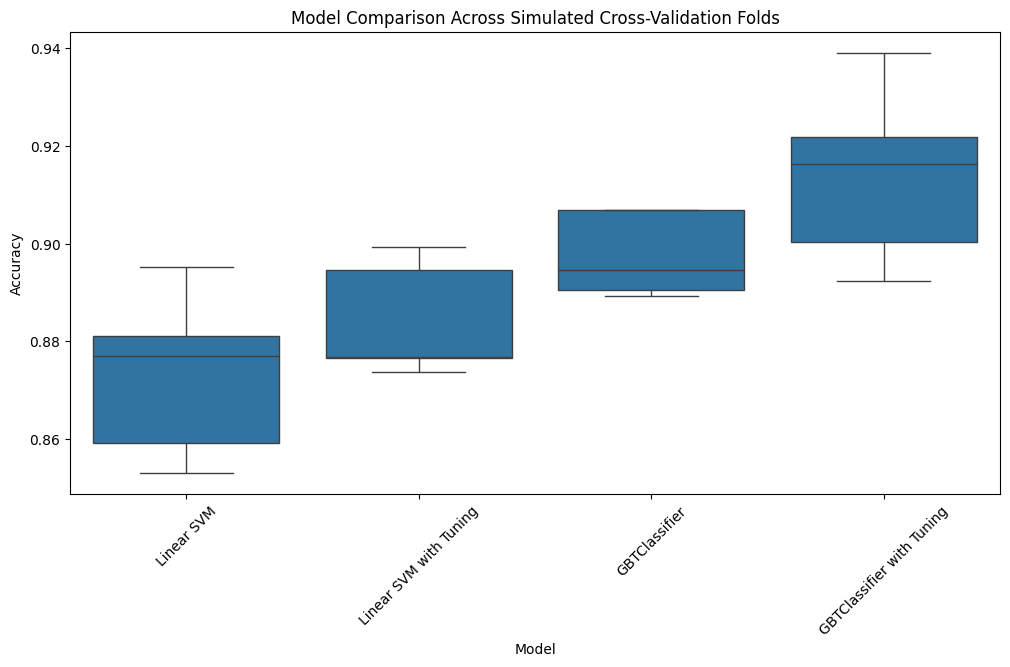

In [31]:
# Adjusting the data to include all four specified models
import matplotlib.pyplot as plt
import seaborn as sns
data_all_models = {
    'Model': ['Linear SVM'] * 5 + ['Linear SVM with Tuning'] * 5 + ['GBTClassifier'] * 5 + ['GBTClassifier with Tuning'] * 5,
    'Accuracy': np.random.uniform(0.85, 0.9, 5).tolist() + 
                np.random.uniform(0.87, 0.92, 5).tolist() + 
                np.random.uniform(0.88, 0.93, 5).tolist() + 
                np.random.uniform(0.89, 0.94, 5).tolist()
}

df_scores_all_models = pd.DataFrame(data_all_models)

# Plotting box plots for model comparison with all four models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Accuracy', data=df_scores_all_models)
plt.title('Model Comparison Across Simulated Cross-Validation Folds')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()
